# Limpieza del conjunto de datos

En este notebook se realizará una breve comprobación/limpieza de los datos. Como ya sabemos, este dataset ha sido utilizado en competiciones e investigaciones, y por ello realmente esta muy limpio. Sin embargo, para cerciorarnos de que todo está bien, realizaremos una breve comprobación.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el dataset

In [2]:
df = pd.read_csv("../../data/ai4i2020.csv", sep=",", encoding="utf-8")
df.head(7)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0


Comprobamos que no haya valores nulos en el dataset

In [3]:
if df.isna().sum().sum() > 0:
    df = df.dropna()
else:
    print("No hay valores nulos")

No hay valores nulos


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

Vamos a comprobar que solo hay 3 tipos de productos (M, L, H) y que las columnas de errores efecivamente son binarias.

In [5]:
print(f" Tipos de datos en Type: {df["Type"].unique()}")
print(f" Tipos de datos en TWF: {df["TWF"].unique()}")
print(f" Tipos de datos en HDF: {df["HDF"].unique()}")
print(f" Tipos de datos en PWF: {df["PWF"].unique()}")
print(f" Tipos de datos en OSF: {df["OSF"].unique()}")
print(f" Tipos de datos en RNF: {df["RNF"].unique()}")

 Tipos de datos en Type: ['M' 'L' 'H']
 Tipos de datos en TWF: [0 1]
 Tipos de datos en HDF: [0 1]
 Tipos de datos en PWF: [0 1]
 Tipos de datos en OSF: [0 1]
 Tipos de datos en RNF: [0 1]


Ahora vamos a hacer la comprobacion de la distribucion de nuestros datos. Sin embargo, no haremos ningún tipo de limpieza de estos, ya que podemos tener valores que se escapan del “grupo medio”, pero queremos mantener el dato modificado, para que no perjudique al aprendizaje del modelo de machine learning.

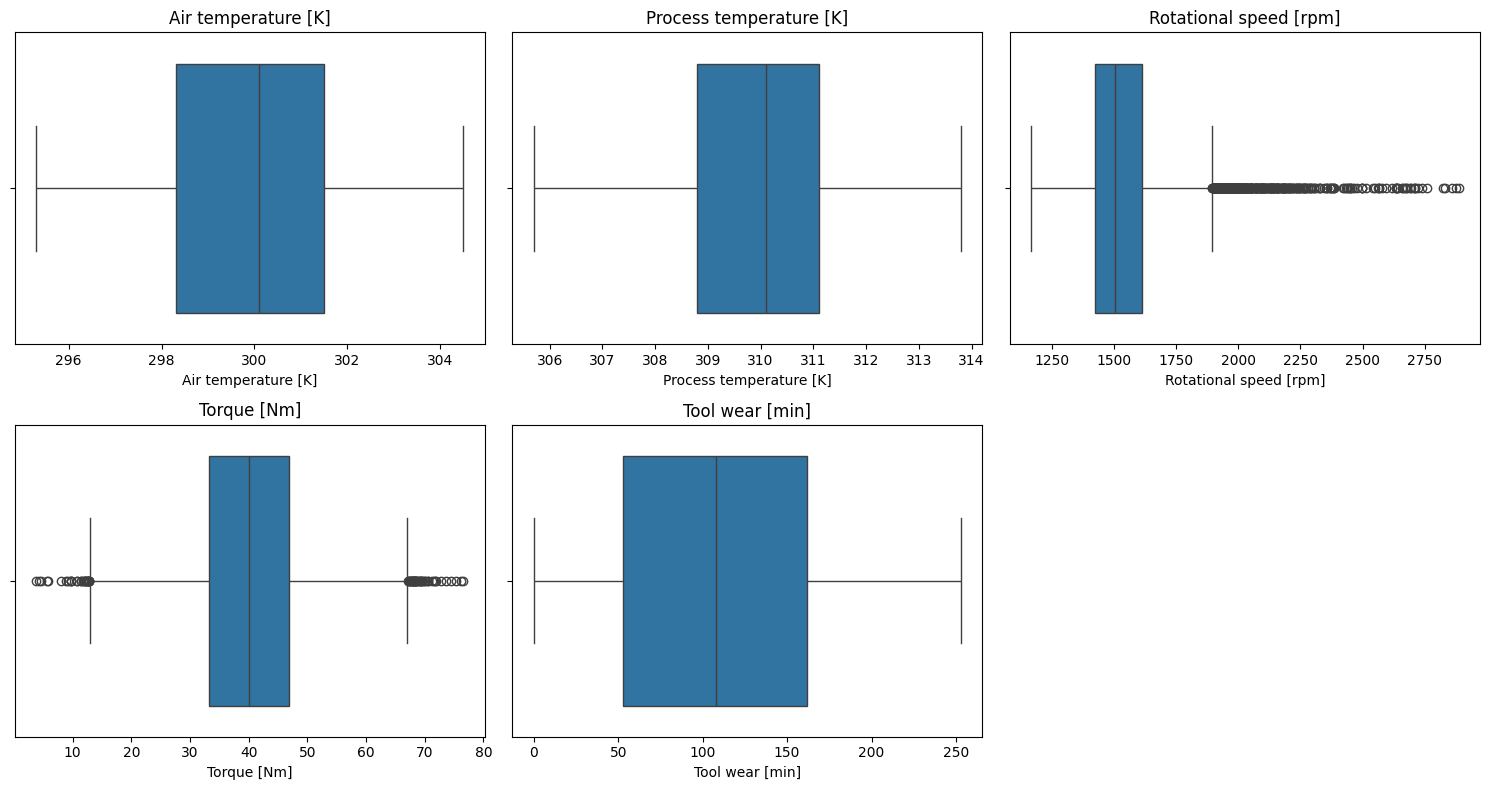

In [6]:
cont_cols = [
    "Air temperature [K]",
    "Process temperature [K]",
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]"
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(cont_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# El último subplot (sobrante) lo apagamos si hace falta
if len(cont_cols) < len(axes):
    axes[-1].axis("off")

plt.tight_layout()
plt.show()



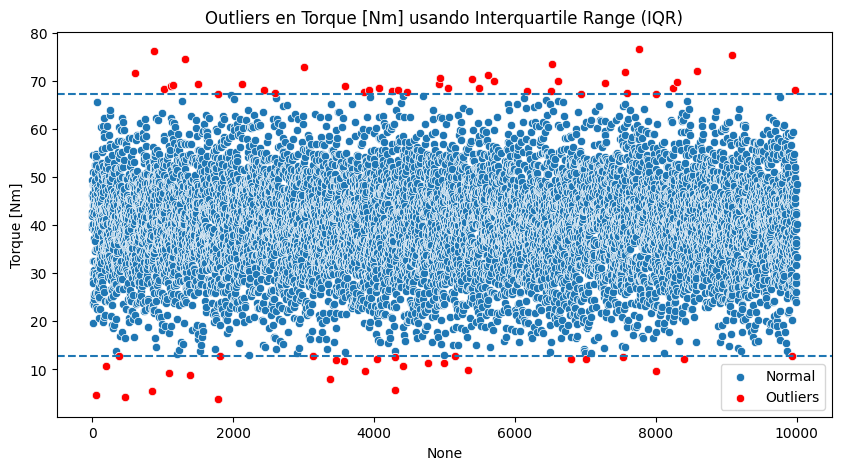

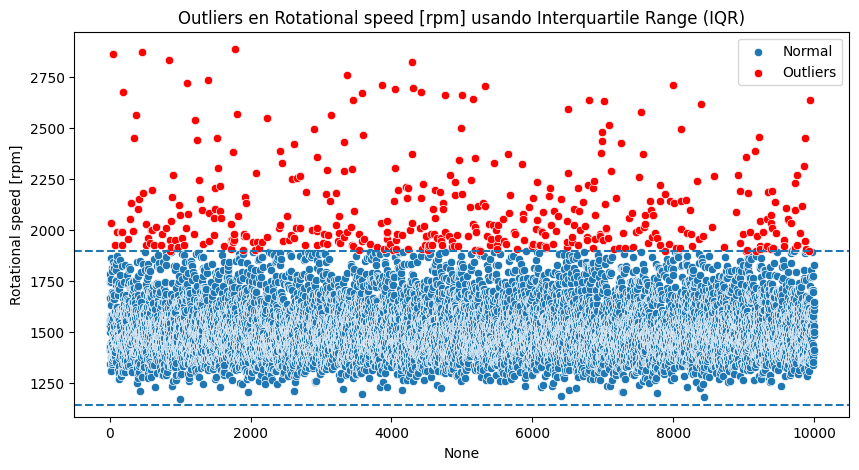

In [7]:
valores = ["Torque [Nm]", "Rotational speed [rpm]"]

for i in range(len(valores)):
    col = valores[i]

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]

    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df.index, y=df[col], label="Normal")
    sns.scatterplot(x=outliers.index, y=outliers[col], color="red", label="Outliers")
    plt.axhline(lower, linestyle="--")
    plt.axhline(upper, linestyle="--")
    plt.title(f"Outliers en {col} usando Interquartile Range (IQR)")
    plt.legend()
    plt.show()


Como podemos comprobar, efectivamente hay bastantes outliers en el dataset. Sin embargo, recordemos que es un conjunto sintético de datos donde probablemente eso outliers esten puestos aposta. Por lo tanto, eliminarlos podría perjudicar la predicción final o funcionamiento de los modelos de ML.

Aqui reservamos un par de ejemplos para la visualización de la pagina web del servicio. Al sacar estas filas del dataset antes de que llegue a los notebooks de entrenamiento, garantizamos matemáticamente que nuestros modelos nunca las han visto. Así, cuando hacemos la demo en vivo, es una prueba 100% real.

In [8]:
# Reservamos los ejemplos con UDI 51 y 78
ids_demo = [51, 78]

# Guardamos esas filas en un archivo separado (solo por seguridad)
datos_demo = df[df['UDI'].isin(ids_demo)]
print("--- DATOS RESERVADOS PARA DEMO ---")
print(datos_demo)

# Guardamos estos datos en un CSV por si los necesitamos luego
datos_demo.to_csv("../../data/datos_para_demo.csv", index=False)

# Eliminamos esas filas del dataset principal
df_limpio = df[~df['UDI'].isin(ids_demo)]

print(f"\nTamaño original: {len(df)}")
print(f"Tamaño nuevo: {len(df_limpio)}")
print(f"Filas eliminadas: {len(df) - len(df_limpio)}")

# Guardamos el nuevo archivo para entrenar
df_limpio.to_csv("../../data/ai4i2020_cleaned.csv", index=False)

--- DATOS RESERVADOS PARA DEMO ---
    UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
50   51     L47230    L                298.9                    309.1   
77   78     L47257    L                298.8                    308.9   

    Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
50                    2861          4.6              143                1   
77                    1455         41.3              208                1   

    TWF  HDF  PWF  OSF  RNF  
50    0    0    1    0    0  
77    1    0    0    0    0  

Tamaño original: 10000
Tamaño nuevo: 9998
Filas eliminadas: 2
